In [1]:
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))


In [207]:
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 46
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(6, 5))
from datetime import datetime
from IPython.display import Image

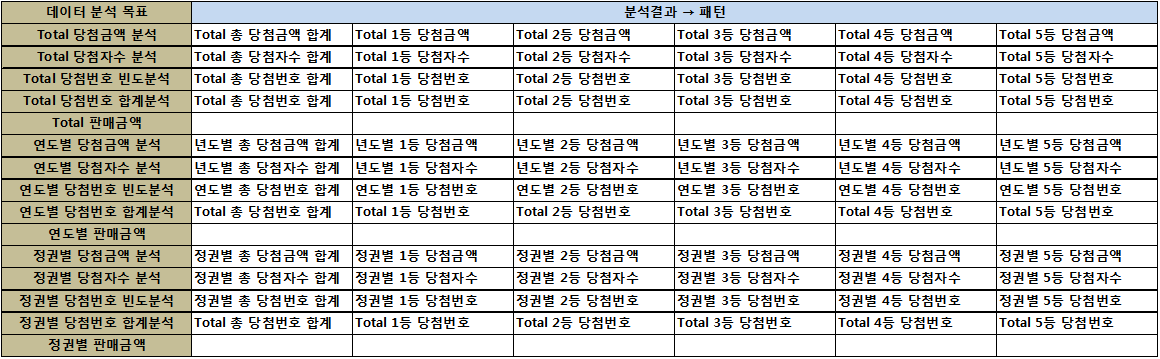

#### 김대중 정권:  1회차~12회차 (2002.12.07~2003.2.22): 12회
 ##### 로또복권의 1등 당첨금 이월횟수가 2003.02.08일 10회차 추첨)부터 5회에서 2회로 제한 됨
#### 노무현 정권:  13회차~273회차(2003.03.01~2008.02.23): 261회
 ##### 2004년 8월 1일 이후 88회차부터 로또 1장가격 2000원 → 1000원으로 인하됨
 ##### 262회부터 계약 만료로 인해 당첨금 지급 은행이 국민은행에서 NH농협은행으로 바뀜
#### 이명박 정권:  274회차~534회차(2008.03.01~2013.02.23): 261회
#### 박근혜 정권:  535회차~744회차(2013.03.02~2017.03.04): 210회
#### 문재인 정권:  745회차~812회차(2017.03.11~현재: 2018.06.23): 68회

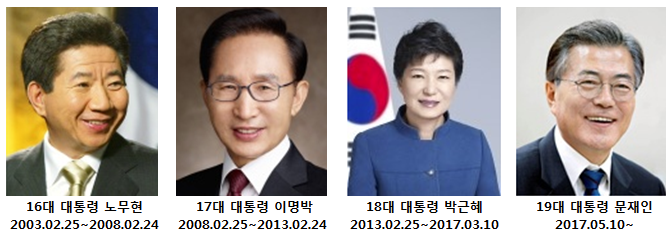

# 로또 당첨금액 배분 비율
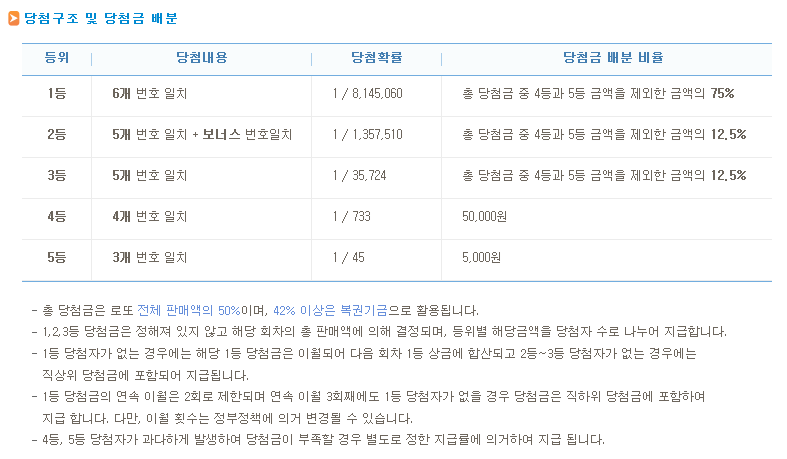

In [ ]:
# '추첨일'을 index로 선정, data type을 datetime64로 동시 변환
df=pd.read_excel('C:/Users/edu/lotto.xlsx', index_col='date', parse_dates=True)

In [8]:
df.index

DatetimeIndex(['2018-06-23', '2018-06-16', '2018-06-09', '2018-06-02',
               '2018-05-26', '2018-05-19', '2018-05-12', '2018-05-05',
               '2018-04-28', '2018-04-21',
               ...
               '2003-02-08', '2003-02-01', '2003-01-25', '2003-01-18',
               '2003-01-11', '2003-01-04', '2002-12-28', '2002-12-21',
               '2002-12-14', '2002-12-07'],
              dtype='datetime64[ns]', name='date', length=812, freq=None)

In [9]:
df.columns

Index(['No', 'prize1', 'prize2', 'prize3', 'prize4', 'prize5', 'n1', 'n2',
       'n3', 'n4', 'n5', '1th', '2nd', '3rd', '4th', '5th', '6th', '+@'],
      dtype='object')

In [ ]:
# 당첨금액을 숫자화: '원' 제거
f= lambda x: x.rstrip('원')
df[['1등 당첨금','2등 당첨금','3등 당첨금','4등 당첨금','5등 당첨금']]=df[[
    '1등 당첨금','2등 당첨금','3등 당첨금','4등 당첨금','5등 당첨금']].applymap(f)

In [ ]:
# 당첨금액을 숫자화: ','제거 후 타입변환
f2= lambda x: str(x.replace(',',''))
df[['1등 당첨금','2등 당첨금','3등 당첨금','4등 당첨금','5등 당첨금']]=df[[
    '1등 당첨금','2등 당첨금','3등 당첨금','4등 당첨금','5등 당첨금']].applymap(f2).astype(float)

In [10]:
# data 정보 조회, 행열 size 확인
df.info()
# 총 812회차 , 컬럼명 영문,짧게 수정후 정렬 ,int64로 전부 수치화 , 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 812 entries, 2018-06-23 to 2002-12-07
Data columns (total 18 columns):
No        812 non-null int64
prize1    812 non-null int64
prize2    812 non-null int64
prize3    812 non-null int64
prize4    812 non-null int64
prize5    812 non-null int64
n1        812 non-null int64
n2        812 non-null int64
n3        812 non-null int64
n4        812 non-null int64
n5        812 non-null int64
1th       812 non-null int64
2nd       812 non-null int64
3rd       812 non-null int64
4th       812 non-null int64
5th       812 non-null int64
6th       812 non-null int64
+@        812 non-null int64
dtypes: int64(18)
memory usage: 120.5 KB


In [11]:
# DataFrame check
df.head()

,No,prize1,prize2,prize3,prize4,prize5,n1,n2,n3,n4,n5,1th,2nd,3rd,4th,5th,6th,+@
date,,,,,,,,,,,,,,,,,,
2018-06-23,812,2947954750,43352276,1491880,50000,5000,6,68,1976,100498,1693074,1,3,12,14,16,43,10
2018-06-16,811,2524148197,60098767,1369057,50000,5000,7,49,2151,104155,1703788,8,11,19,21,36,45,25
2018-06-09,810,2231598047,46491626,1449325,50000,5000,8,64,2053,100608,1672013,5,10,13,21,39,43,11
2018-06-02,809,2921372750,52167371,1340695,50000,5000,6,56,2179,104350,1703714,6,11,15,17,23,40,39
2018-05-26,808,3087620500,67122185,1573711,50000,5000,6,46,1962,95319,1597761,15,21,31,32,41,43,24


In [12]:
# raw_data 요약 통계 확인 
df.describe().round(0)

,No,prize1,prize2,prize3,prize4,prize5,n1,n2,n3,n4,n5,1th,2nd,3rd,4th,5th,6th,+@
count,812.0,8.120000e+02,812.0,812.0,812.0,812.0,812.0,812.0,812.0,812.0,812.0,812.0,812.0,812.0,812.0,812.0,812.0,812.0
mean,406.0,2.789261e+09,66022934.0,1639768.0,60422.0,5536.0,7.0,39.0,1472.0,72464.0,1183383.0,7.0,13.0,20.0,26.0,33.0,39.0,22.0
std,235.0,2.770645e+09,43158089.0,752005.0,23549.0,1547.0,4.0,15.0,538.0,28780.0,298796.0,5.0,7.0,7.0,8.0,7.0,5.0,13.0
min,1.0,0.000000e+00,0.0,652637.0,27300.0,5000.0,0.0,0.0,28.0,2537.0,40155.0,1.0,2.0,3.0,5.0,9.0,19.0,1.0
25%,204.0,1.500835e+09,48789328.0,1346381.0,50000.0,5000.0,4.0,29.0,1204.0,59967.0,992082.0,2.0,8.0,14.0,21.0,28.0,37.0,11.0
50%,406.0,1.998324e+09,57340878.0,1482862.0,50000.0,5000.0,6.0,37.0,1426.0,70586.0,1154892.0,5.0,12.0,19.0,26.0,34.0,41.0,22.0
75%,609.0,3.187972e+09,69117077.0,1627772.0,59773.0,5000.0,8.0,46.0,1702.0,83152.0,1355248.0,9.0,17.0,25.0,32.0,38.0,44.0,34.0
max,812.0,4.072296e+10,769456500.0,9307100.0,260000.0,10000.0,30.0,236.0,11247.0,703234.0,3410846.0,35.0,37.0,39.0,43.0,44.0,45.0,45.0


In [145]:
# 1등 당첨금의 금액크기로 정렬
df.sort_values(by='prize1',ascending=False).head(10)

,No,prize1,prize2,prize3,prize4,prize5,n1,n2,n3,n4,n5,1th,2nd,3rd,4th,5th,6th,+@
date,,,,,,,,,,,,,,,,,,
2003-04-12,19,40722959400,297278500,5971100,150900,10000,1,14,697,55154,1135991,6,30,38,39,40,43,26
2003-05-24,25,24227745300,175267400,4417100,166600,10000,2,28,1111,58903,1096200,2,4,21,26,43,44,16
2003-04-19,20,19352212800,230383400,3632100,133900,10000,1,14,888,48158,827470,10,14,18,20,23,30,41
2003-09-27,43,17749630800,140870000,3194600,131200,10000,1,21,926,45078,776043,6,31,35,38,39,44,1
2003-03-15,15,17014245000,177231700,5571100,144600,10000,1,16,509,39202,827538,3,4,16,30,31,37,13
2003-08-09,36,16014475800,140477800,3475300,139300,10000,1,19,768,38321,673755,1,10,23,26,28,40,31
2004-02-07,62,15817286400,119827900,3179900,126400,10000,1,22,829,41686,700804,3,8,15,27,29,35,21
2003-07-19,33,14903517600,60583400,2336700,95200,10000,1,41,1063,52142,888943,4,7,32,33,40,41,9
2004-06-26,82,14562494400,121354120,3810177,134320,10000,1,20,637,36139,638058,1,2,3,14,27,42,39


In [148]:
# 1등 당첨금/ 당첨자수 크기로 정렬
df['prize1/n']=df['prize1']/df['n1']
df.sort_values(by='prize1/n',ascending=False).head(5)

,No,prize1,prize2,prize3,prize4,prize5,n1,n2,n3,n4,n5,1th,2nd,3rd,4th,5th,6th,+@,prize1/n
date,,,,,,,,,,,,,,,,,,,
2003-04-12,19,40722959400,297278500,5971100,150900,10000,1,14,697,55154,1135991,6,30,38,39,40,43,26,4.072296e+10
2003-04-19,20,19352212800,230383400,3632100,133900,10000,1,14,888,48158,827470,10,14,18,20,23,30,41,1.935221e+10
2003-09-27,43,17749630800,140870000,3194600,131200,10000,1,21,926,45078,776043,6,31,35,38,39,44,1,1.774963e+10
2003-03-15,15,17014245000,177231700,5571100,144600,10000,1,16,509,39202,827538,3,4,16,30,31,37,13,1.701424e+10
2003-08-09,36,16014475800,140477800,3475300,139300,10000,1,19,768,38321,673755,1,10,23,26,28,40,31,1.601448e+10


In [151]:
# 로또가 이월된 횟수, 회차 정보
df.sort_values(by='prize1/n',ascending=False).tail(15)

,No,prize1,prize2,prize3,prize4,prize5,n1,n2,n3,n4,n5,1th,2nd,3rd,4th,5th,6th,+@,prize1/n
date,,,,,,,,,,,,,,,,,,,
2013-05-18,546,405939950,36903632,652637,50000,5000,30,55,3110,104469,1379107,8,17,20,27,37,43,6,1.353133e+07
2011-10-15,463,0,54687384,1613584,50000,5000,0,37,1254,62251,1060512,23,29,31,33,34,44,40,NaN
2008-07-26,295,0,62969875,1616207,59131,5000,0,26,1013,55376,950380,1,4,12,16,18,38,8,NaN
2008-06-14,289,0,63761694,1501748,58541,5000,0,24,1019,52281,880103,3,14,33,37,38,42,10,NaN
2004-04-10,71,0,88745200,3177500,125700,10000,0,28,782,39516,659631,5,9,12,16,29,41,21,NaN
2003-09-13,41,0,109404000,3282100,135900,10000,0,21,700,33805,583744,13,20,23,35,38,43,34,NaN
2003-05-17,24,0,176023700,3425300,120000,10000,0,18,925,52777,755905,7,8,27,29,36,43,6,NaN
2003-04-05,18,0,175017300,3953700,136500,10000,0,15,664,38453,693323,3,12,13,19,32,35,29,NaN
2003-03-01,13,0,433309300,5777400,175600,10000,0,6,450,29601,726751,22,23,25,37,38,42,26,NaN


In [15]:
# DataFrame 분리: 당첨금 df1, 당첨자수 df2, 당첨 번호 df3
df1=df[['No', 'prize1', 'prize2', 'prize3', 'prize4', 'prize5']]
df2=df[['No', 'n1', 'n2','n3', 'n4', 'n5']]
df3=df[['No','1th', '2nd', '3rd', '4th', '5th', '6th', '+@']]
df3.head()

,No,1th,2nd,3rd,4th,5th,6th,+@
date,,,,,,,,
2018-06-23,812,1,3,12,14,16,43,10
2018-06-16,811,8,11,19,21,36,45,25
2018-06-09,810,5,10,13,21,39,43,11
2018-06-02,809,6,11,15,17,23,40,39
2018-05-26,808,15,21,31,32,41,43,24


In [205]:
# 6개의 공을 오름차순으로 정렬시 첫번째~6번째 볼의 번호별 출현빈도 구하여 DataFrame으로 나타냄
b1_f= df3['No'].groupby(df3['1th']).size()
b2_f= df3['No'].groupby(df3['2nd']).size()
b3_f= df3['No'].groupby(df3['3rd']).size()
b4_f= df3['No'].groupby(df3['4th']).size()
b5_f= df3['No'].groupby(df3['5th']).size()
b6_f= df3['No'].groupby(df3['6th']).size()
bbonus_f= df3['No'].groupby(df3['+@']).size()

In [53]:
df_f=DataFrame({'b1_f':b1_f,
                'b2_f':b2_f,
                'b3_f':b3_f,
                'b4_f':b4_f,
                'b5_f':b5_f,
                'b6_f':b6_f,
                'bbonus_f':bbonus_f}, index=range(1,46)).fillna(0)

In [208]:
# 볼별 출현 빈도수 확인
df_f

,b1_f,b2_f,b3_f,b4_f,b5_f,b6_f,bbonus_f
1,118.0,0.0,0.0,0.0,0.0,0.0,26
2,89.0,18.0,0.0,0.0,0.0,0.0,24
3,78.0,27.0,3.0,0.0,0.0,0.0,18
4,76.0,32.0,4.0,0.0,0.0,0.0,23
5,70.0,37.0,5.0,1.0,0.0,0.0,14
6,64.0,27.0,11.0,3.0,0.0,0.0,22
7,50.0,51.0,10.0,0.0,0.0,0.0,19
8,40.0,54.0,16.0,3.0,0.0,0.0,18
9,24.0,39.0,13.0,4.0,1.0,0.0,18
10,33.0,56.0,26.0,1.0,1.0,0.0,19


In [209]:
# 볼별 출현 확률 확인
df_p=(df_f/812*100).round(0)
df_p

,b1_f,b2_f,b3_f,b4_f,b5_f,b6_f,bbonus_f
1,15.0,0.0,0.0,0.0,0.0,0.0,3.0
2,11.0,2.0,0.0,0.0,0.0,0.0,3.0
3,10.0,3.0,0.0,0.0,0.0,0.0,2.0
4,9.0,4.0,0.0,0.0,0.0,0.0,3.0
5,9.0,5.0,1.0,0.0,0.0,0.0,2.0
6,8.0,3.0,1.0,0.0,0.0,0.0,3.0
7,6.0,6.0,1.0,0.0,0.0,0.0,2.0
8,5.0,7.0,2.0,0.0,0.0,0.0,2.0
9,3.0,5.0,2.0,0.0,0.0,0.0,2.0
10,4.0,7.0,3.0,0.0,0.0,0.0,2.0


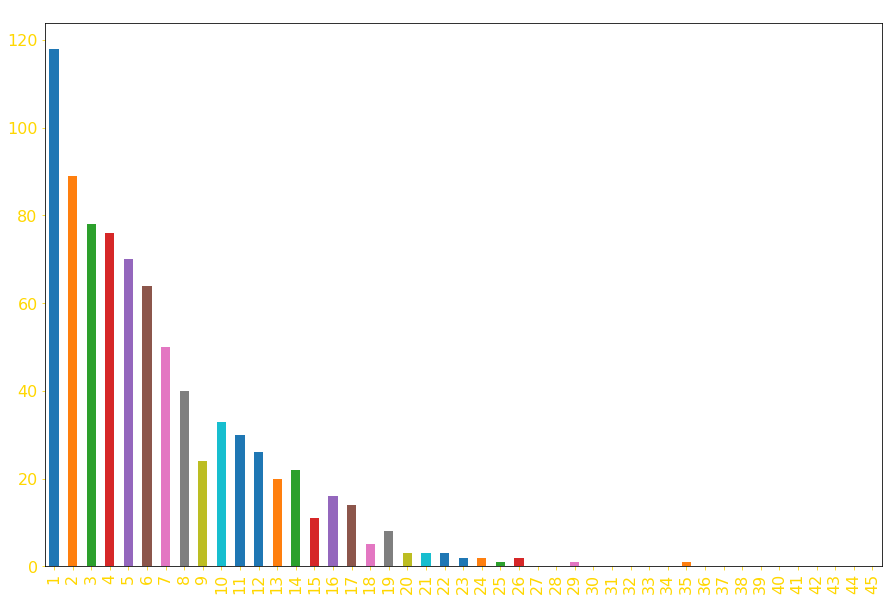

In [119]:
plt.close('all')
fig, axes = plt.subplots(1,1, figsize=(15,10))
df_f['b1_f'].plot(kind='bar',title='1th Ball',fontsize=16)
plt.show()

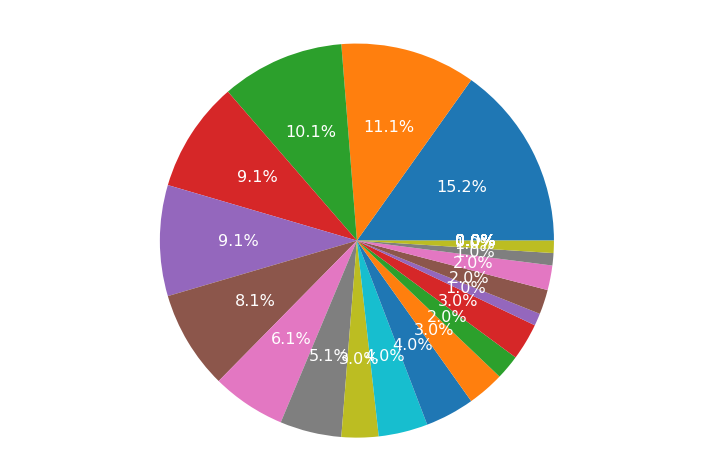

In [132]:
plt.close('all')
df_p['b1_f'].plot(kind='pie',title='1th Ball',fontsize=16,autopct='%1.1f%%',figsize=(12,8))
plt.axis('equal')
plt.show()

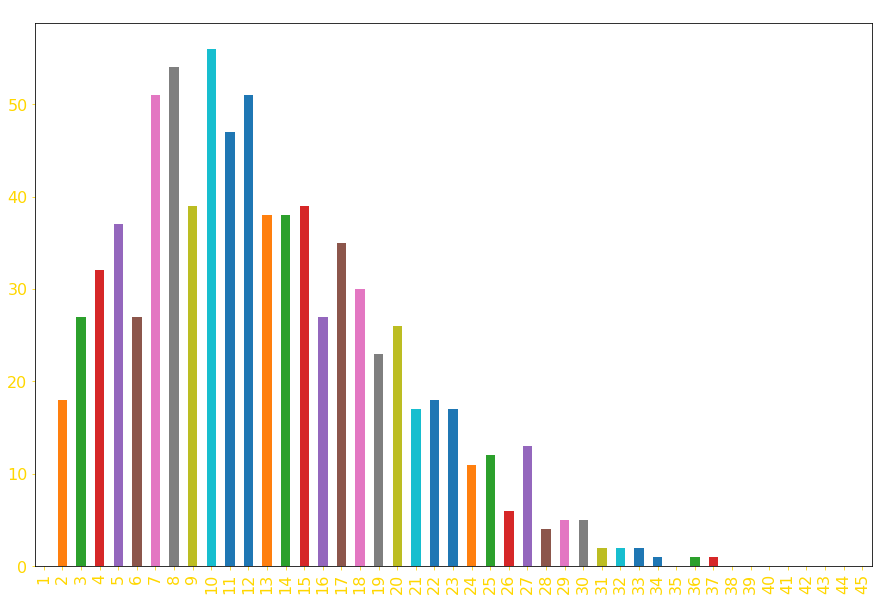

In [120]:
plt.close('all')
fig, axes = plt.subplots(1,1, figsize=(15,10))
df_f['b2_f'].plot(kind='bar',title='2nd Ball',fontsize=16)
plt.show()

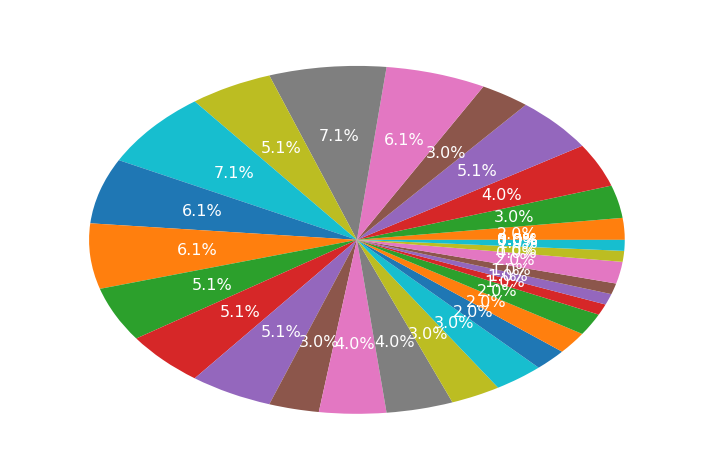

In [133]:
plt.close('all')
df_p['b2_f'].plot(kind='pie',title='2nd Ball',fontsize=16,autopct='%1.1f%%',figsize=(12,8))
plt.show()

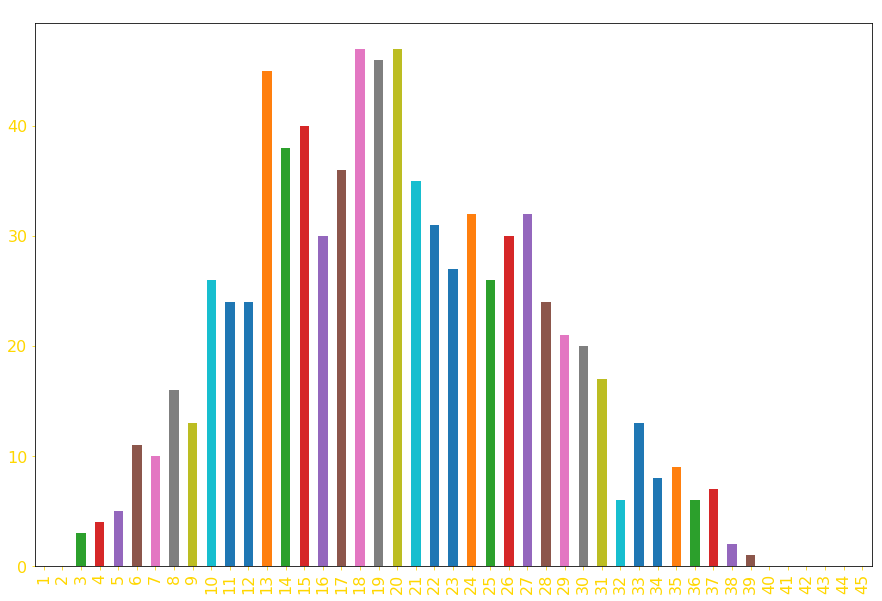

In [122]:
plt.close('all')
fig, axes = plt.subplots(1,1, figsize=(15,10))
df_f['b3_f'].plot(kind='bar',title='3rd Ball',fontsize=16)
plt.show()

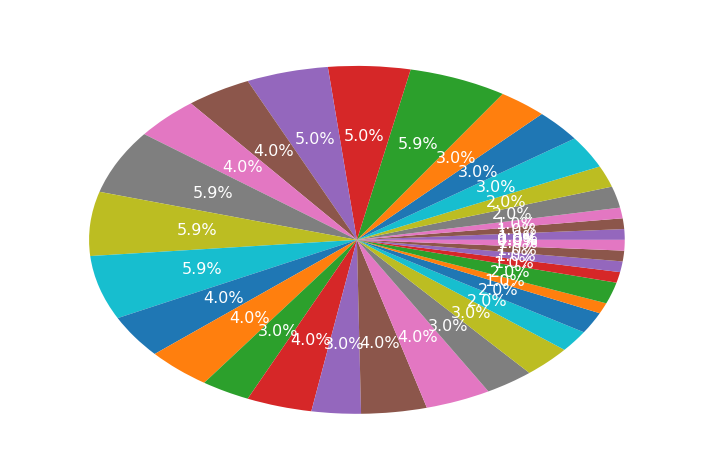

In [134]:
plt.close('all')
df_p['b3_f'].plot(kind='pie',title='3rd Ball',fontsize=16,autopct='%1.1f%%',figsize=(12,8))
plt.show()

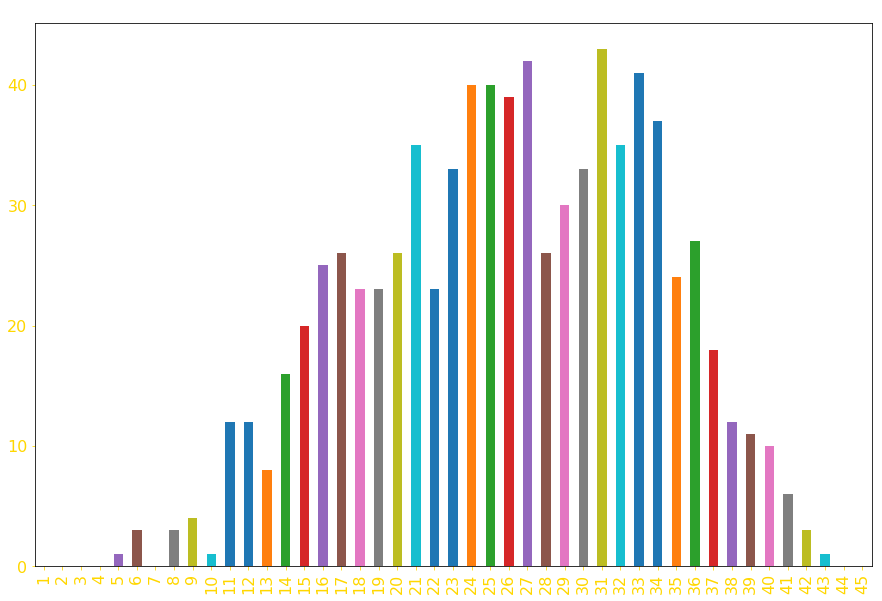

In [124]:
plt.close('all')
fig, axes = plt.subplots(1,1, figsize=(15,10))
df_f['b4_f'].plot(kind='bar',title='4th Ball',fontsize=16)
plt.show()

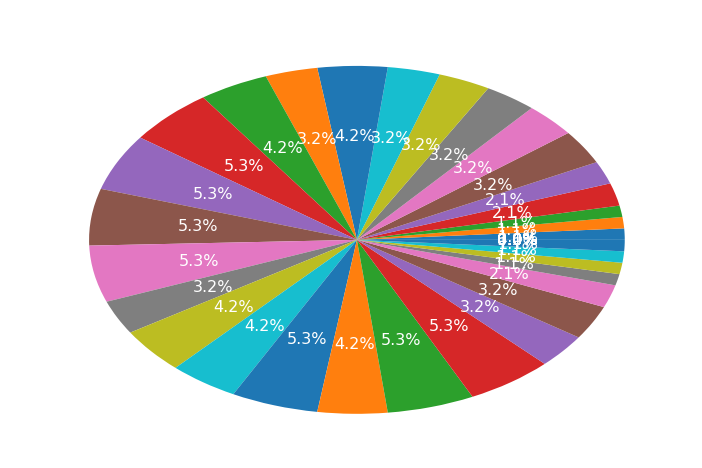

In [135]:
plt.close('all')
df_p['b4_f'].plot(kind='pie',title='4th Ball',fontsize=16,autopct='%1.1f%%',figsize=(12,8))
plt.show()

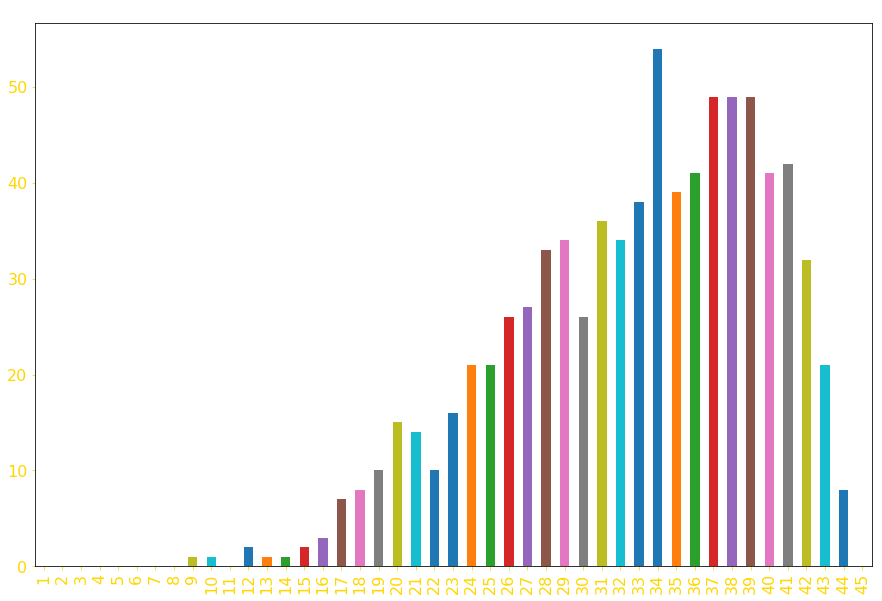

In [126]:
plt.close('all')
fig, axes = plt.subplots(1,1, figsize=(15,10))
df_f['b5_f'].plot(kind='bar',title='5th Ball',fontsize=16)
plt.show()

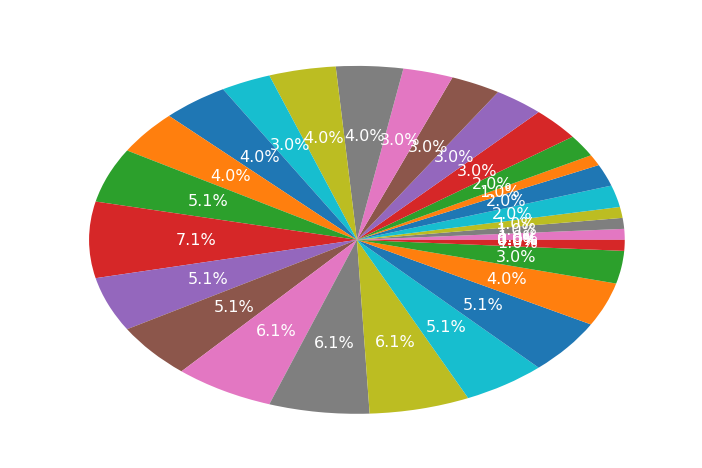

In [136]:
plt.close('all')
df_p['b5_f'].plot(kind='pie',title='5th Ball',fontsize=16,autopct='%1.1f%%',figsize=(12,8))
plt.show()

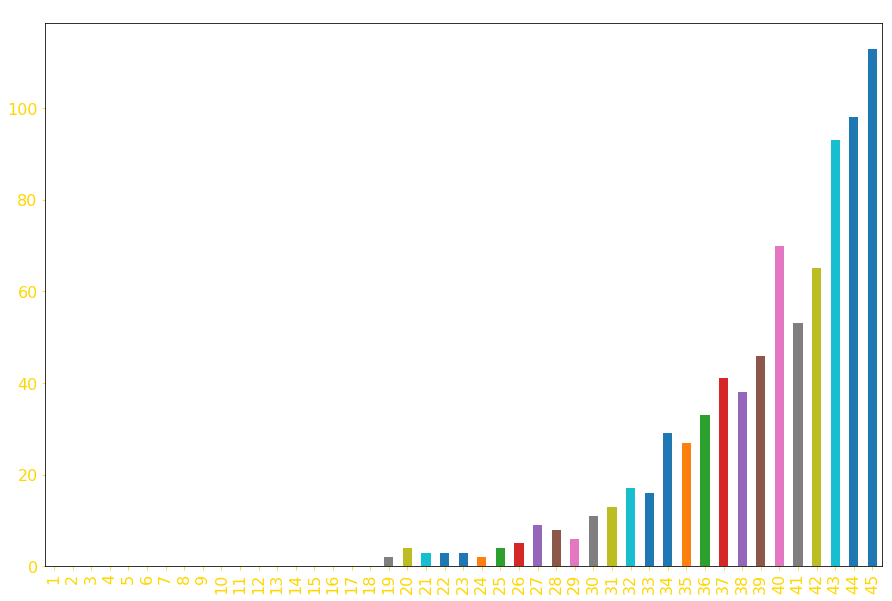

In [137]:
plt.close('all')
fig, axes = plt.subplots(1,1, figsize=(15,10))
df_f['b6_f'].plot(kind='bar',title='6th Ball',fontsize=16)
plt.show()

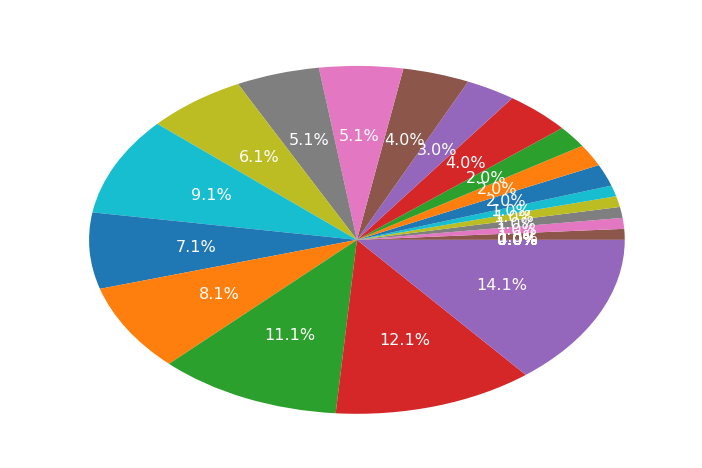

In [138]:
plt.close('all')
df_p['b6_f'].plot(kind='pie',title='6th Ball',fontsize=16,autopct='%1.1f%%',figsize=(12,8))
plt.show()

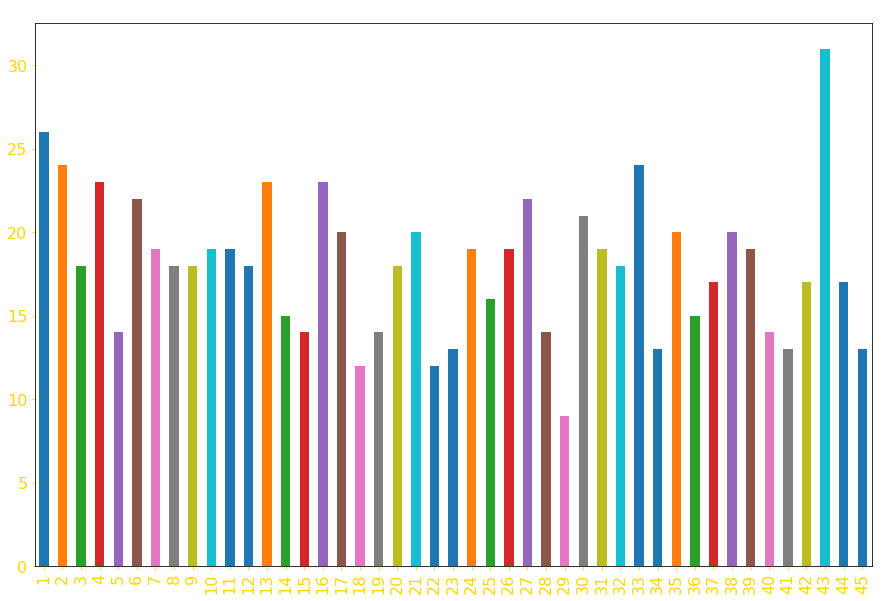

In [140]:
plt.close('all')
fig, axes = plt.subplots(1,1, figsize=(15,10))
df_f['bbonus_f'].plot(kind='bar',title='Bonus Ball',fontsize=16)
plt.show()

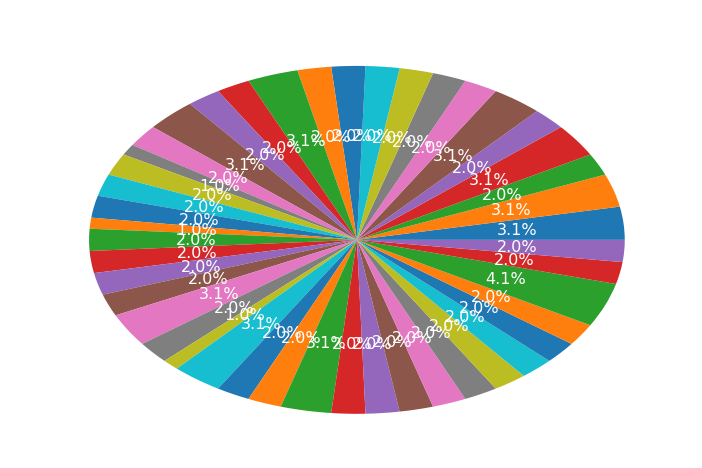

In [139]:
plt.close('all')
df_p['bbonus_f'].plot(kind='pie',title='Bonus Ball',fontsize=16,autopct='%1.1f%%',figsize=(12,8))
plt.show()

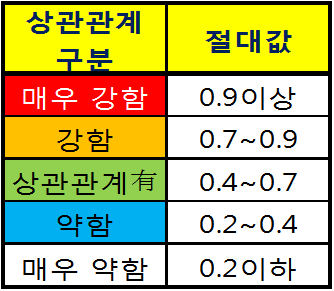

In [155]:
# 로또 데이터 전체 상관분석: 상관계수 0.7이상만
a=df.corr()
a[a>0.7]

,No,prize1,prize2,prize3,prize4,prize5,n1,n2,n3,n4,n5,1th,2nd,3rd,4th,5th,6th,+@,prize1/n
No,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.749235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prize1,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.946872
prize2,NaN,NaN,1.000000,0.805867,0.767839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prize3,NaN,NaN,0.805867,1.000000,0.908003,0.742452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prize4,NaN,NaN,0.767839,0.908003,1.000000,0.860289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prize5,NaN,NaN,NaN,0.742452,0.860289,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.823215,0.794699,0.763940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.823215,1.000000,0.964976,0.850480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.794699,0.964976,1.000000,0.805959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
# 로또 번호만 상관분석: 상관계수 0.7이상, 1.0미만 만
a=df3.corr()
b=a[a>0.7]
c=b[b<1.0]
c

,No,1th,2nd,3rd,4th,5th,6th,+@
No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1th,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd,NaN,NaN,NaN,0.725831,NaN,NaN,NaN,NaN
3rd,NaN,NaN,0.725831,NaN,0.786108,NaN,NaN,NaN
4th,NaN,NaN,NaN,0.786108,NaN,0.750545,NaN,NaN
5th,NaN,NaN,NaN,NaN,0.750545,NaN,NaN,NaN
6th,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
+@,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
from scipy import stats,polyval
from matplotlib import pylab
from pylab import plot,title,legend,show,xlabel,ylabel

In [162]:
model=stats.linregress(df['2nd'], df['3rd'])
reg_line= polyval([model.slope,model.intercept],df['2nd'])
s=model.slope
r=model.rvalue
rsquare=r*r
i=model.intercept
display(s); display(i); display(rsquare)

0.7931878395676258

9.49232882370688

0.5268313391522906

f(x)=0.79x + 9.49, r^2=0.53

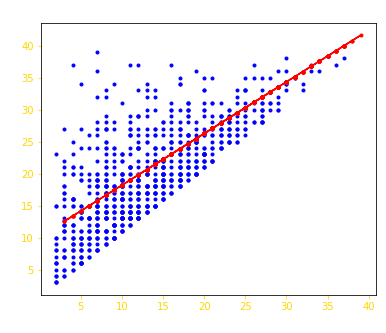

In [168]:
plt.close('all')
plot(df['2nd'], df['3rd'],'b.')
plot(df['3rd'], reg_line,'r.-')
title('2nd Ball & 3rd Ball: y=0.79x + 9.49, r^2=0.53')
xlabel('2nd ball')
ylabel('3rd ball')
show()

In [176]:
# 2번째 번호의 빈도수 top5 로 회귀식을 적용하여 3번째 공을 산출
f = lambda x: 0.7931878395676258*x + 9.49232882370688

In [186]:
j=b2_f.sort_values(ascending=False).head(5)
j

2nd
10    56
8     54
7     51
12    51
11    47
Name: No, dtype: int64

In [185]:
a=f(j.index)
a

Float64Index([ 17.42420721938314, 15.837831540247887, 15.044643700680261,
               19.01058289851839, 18.217395058950764],
             dtype='float64', name='2nd')

In [165]:
model=stats.linregress(df['3rd'], df['4th'])
reg_line= polyval([model.slope,model.intercept],df['3rd'])
s=model.slope
r=model.rvalue
rsquare=r*r
i=model.intercept
display(s); display(i); display(rsquare)

0.8064748442694194

10.135327517847832

0.6179654756345251

f(x)=0.81x + 10.14, r^2=0.62

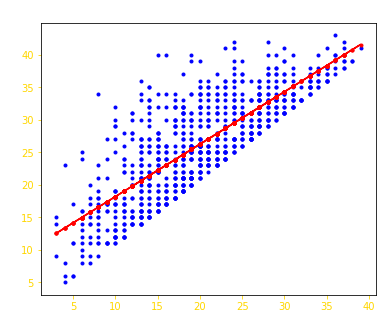

In [170]:
plt.close('all')
plot(df['3rd'], df['4th'],'b.')
plot(df['3rd'], reg_line,'r.-')
title('3rd Ball & 4th Ball: 0.81x + 10.14, r^2=0.62')
xlabel('3rd ball')
ylabel('4th ball')
show()

In [173]:
model=stats.linregress(df['4th'], df['5th'])
reg_line= polyval([model.slope,model.intercept],df['4th'])
s=model.slope
r=model.rvalue
rsquare=r*r
i=model.intercept
display(s); display(i); display(rsquare)

0.6795024199623174

15.047885249552845

0.5633174692062817

f(x)=0.68x + 15.05, r^2=0.56

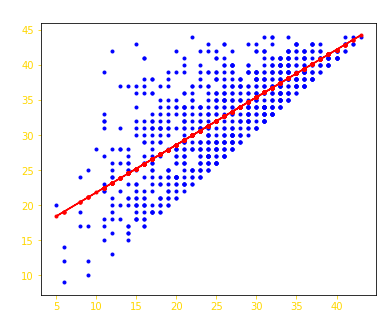

In [174]:
plt.close('all')
plot(df['4th'], df['5th'],'b.')
plot(df['4th'], reg_line,'r.-')
title('4th Ball & 5th Ball: 0.68x + 15.05, r^2=0.56')
xlabel('4th ball')
ylabel('5th ball')
show()

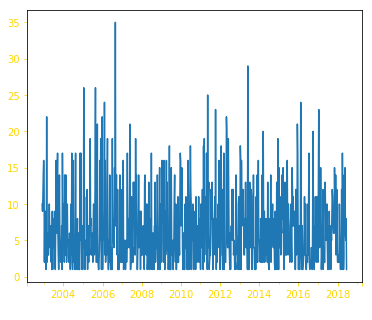

In [192]:
df['1th'].plot(kind='line')
plt.show()

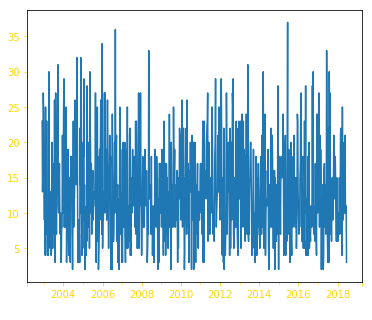

In [195]:
df['2nd'].plot(kind='line')
plt.show()

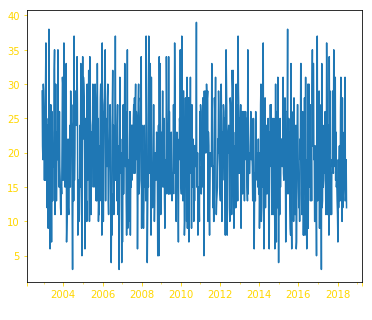

In [196]:
df['3rd'].plot(kind='line')
plt.show()

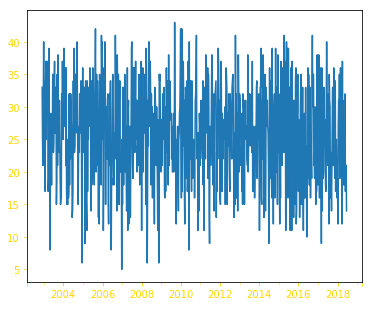

In [198]:
df['4th'].plot(kind='line')
plt.show()

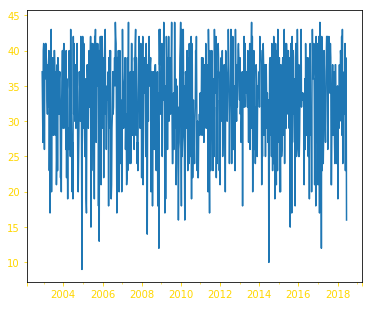

In [199]:
df['5th'].plot(kind='line')
plt.show()

In [202]:
df['6th'].plot(kind='scatter')
plt.show()

ValueError: plot kind 'scatter' can only be used for data frames

In [204]:
df['+@'].plot(kind='scatter')
plt.show()

ValueError: plot kind 'scatter' can only be used for data frames

In [203]:
df.plot?

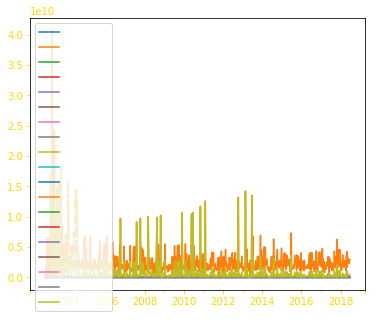

In [194]:
df.plot(kind='line')
plt.show()